In [1]:
from google.colab import files
import zipfile
import os

# Upload the dataset
uploaded = files.upload()  # Select your zipped dataset

# Extract the dataset
dataset_zip = list(uploaded.keys())[0]  # Get the uploaded file name
with zipfile.ZipFile(dataset_zip, 'r') as zip_ref:
    zip_ref.extractall('/content/dataset')  # Extract to /content/dataset

# Check extracted files
os.listdir('/content/dataset')


Saving imagedataset.zip to imagedataset.zip


['Datasets']

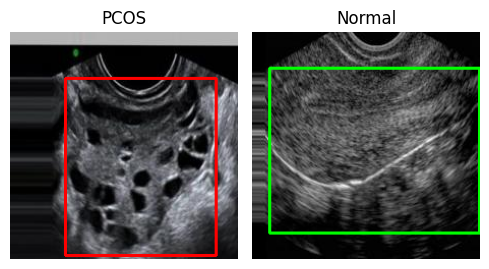

In [2]:
import os
import cv2
import matplotlib.pyplot as plt

# Function to visualize one PCOS and one Normal image in a row
def visualize_pcos_and_normal(image_folder, label_folder):
    pcos_image = None
    normal_image = None

    # Find one PCOS and one Normal image
    for label_name in os.listdir(label_folder):
        label_path = os.path.join(label_folder, label_name)
        with open(label_path, "r") as file:
            for line in file.readlines():
                values = line.strip().split()
                class_id = int(values[0])  # First value in YOLO format is class ID

                image_name = os.path.splitext(label_name)[0] + ".jpg"

                if class_id == 1 and pcos_image is None:
                    pcos_image = image_name
                elif class_id == 0 and normal_image is None:
                    normal_image = image_name

                if pcos_image and normal_image:
                    break  # Stop when both images are found

        if pcos_image and normal_image:
            break  # Stop looping when both images are selected

    # Initialize figure for side-by-side display
    fig, axes = plt.subplots(1, 2, figsize=(5, 5))

    # Visualize the selected images
    for ax, img_name, class_label in zip(axes, [pcos_image, normal_image], ["PCOS", "Normal"]):
        if img_name is None:
            print(f"⚠ No {class_label} image found!")
            ax.axis("off")
            continue

        image_path = os.path.join(image_folder, img_name)
        label_path = os.path.join(label_folder, os.path.splitext(img_name)[0] + ".txt")

        # Load image
        image = cv2.imread(image_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert to RGB for matplotlib
        height, width, _ = image.shape

        # Draw bounding boxes
        with open(label_path, "r") as file:
            for line in file.readlines():
                values = line.strip().split()
                class_id, x_center, y_center, w, h = map(float, values)

                # Convert YOLO format to pixel values
                x1 = int((x_center - w / 2) * width)
                y1 = int((y_center - h / 2) * height)
                x2 = int((x_center + w / 2) * width)
                y2 = int((y_center + h / 2) * height)

                # Set color: Red for PCOS, Green for Normal
                color = (255, 0, 0) if class_label == "PCOS" else (0, 255, 0)

                # Draw bounding box
                cv2.rectangle(image, (x1, y1), (x2, y2), color, 2)

        # Show the image
        ax.imshow(image)
        ax.axis("off")
        ax.set_title(class_label)

    plt.tight_layout()
    plt.show()

# Define paths
train_images_path = "/content/dataset/Datasets/train/images"  # Change to your actual image folder
train_labels_path = "/content/dataset/Datasets/train/labels"  # Change to your actual label folder

# Run visualization
visualize_pcos_and_normal(train_images_path, train_labels_path)


In [3]:

import os

def count_images_in_sets(dataset_path):

  image_counts = {}
  if not os.path.exists(dataset_path):
    print(f"Error: Dataset path '{dataset_path}' does not exist.")
    return image_counts

  for set_name in os.listdir(dataset_path):
    set_path = os.path.join(dataset_path, set_name, "images")
    if os.path.isdir(set_path):
        image_count = 0
        for filename in os.listdir(set_path):
            if filename.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.gif')):
                image_count += 1
        image_counts[set_name] = image_count
  return image_counts


# Example usage (assuming your dataset is extracted to /content/dataset/Datasets):
dataset_path = "/content/dataset/Datasets"
image_counts = count_images_in_sets(dataset_path)
image_counts


{'valid': 23, 'test': 47, 'train': 164}

In [4]:
import os

def count_classes_yolo(label_dir):
    class_counts = {}
    for label_file in os.listdir(label_dir):
        if label_file.endswith(".txt"):
            with open(os.path.join(label_dir, label_file), "r") as f:
                lines = f.readlines()
                for line in lines:
                    try:
                        class_id = int(line.split()[0]) # Convert class_id to integer
                        class_counts[class_id] = class_counts.get(class_id, 0) + 1
                    except (ValueError, IndexError):
                        print(f"Warning: Skipping invalid line in {label_file}: {line.strip()}")
                        continue #Skip to the next line if an error occurs
    return class_counts

dataset_path = "/content/dataset/Datasets"

# Define label directories
train_labels_dir = os.path.join(dataset_path, "train", "labels")
test_labels_dir = os.path.join(dataset_path, "test", "labels")
valid_labels_dir = os.path.join(dataset_path, "valid", "labels")


# Count classes in each dataset split
train_counts = count_classes_yolo(train_labels_dir)
test_counts = count_classes_yolo(test_labels_dir)
valid_counts = count_classes_yolo(valid_labels_dir)

# Print results
print(f"Train Class Counts: {train_counts}")
print(f"Test Class Counts: {test_counts}")
print(f"Validation Class Counts: {valid_counts}")


Train Class Counts: {1: 104, 0: 61}
Test Class Counts: {0: 27, 1: 20}
Validation Class Counts: {1: 10, 0: 13}


Sample Train Images:


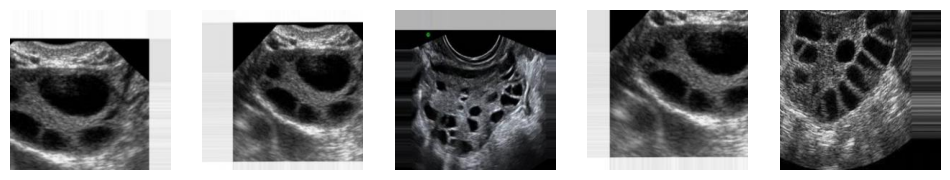


Sample Test Images:


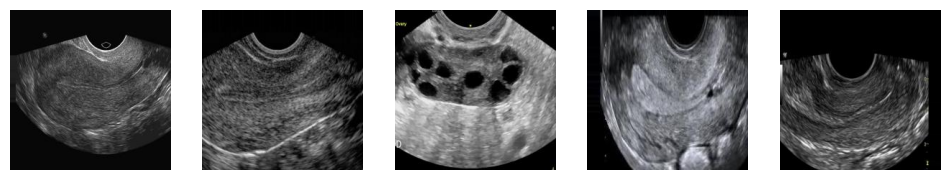


Sample Valid Images:


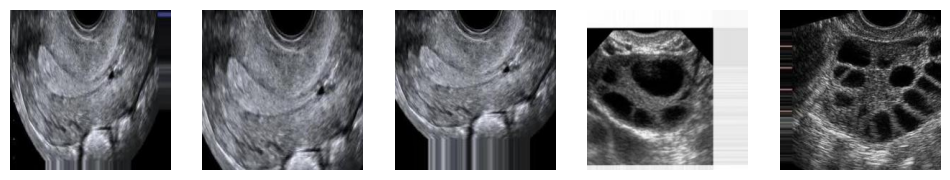

In [5]:
import os
import cv2
import matplotlib.pyplot as plt


def show_sample_images(image_folder, image_list, num_images=5):
    plt.figure(figsize=(12, 6))
    for i in range(num_images):
        try:  # Wrap the image loading and display in a try-except block
            img_path = os.path.join(image_folder, image_list[i])
            img = cv2.imread(img_path)
            if img is None:  # Check if image loading was successful
                print(f"Error loading image: {img_path}")
                continue  # Skip to the next image
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
            plt.subplot(1, num_images, i + 1)
            plt.imshow(img)
            plt.axis("off")
        except Exception as e: # Catch any exception that might occur during processing
            print(f"Error processing image {image_list[i]}: {e}")
            continue # Skip to the next image

    plt.show()

# Example usage (assuming train_images_path, train_images, etc., are defined):
# Replace with your actual paths and image lists

# Example - Replace with your data
train_images_path = "/content/dataset/Datasets/train/images"  # Example path
train_images = os.listdir(train_images_path)[:5]  # Example image list (first 5)

# For test images
test_images_path = "/content/dataset/Datasets/test/images"  # Example path
test_images = os.listdir(test_images_path)[:5]  # Example image list (first 5)

# For valid images
valid_images_path = "/content/dataset/Datasets/valid/images"  # Example path
valid_images = os.listdir(valid_images_path)[:5]  # Example image list (first 5)


print("Sample Train Images:")
show_sample_images(train_images_path, train_images)

print("\nSample Test Images:")
show_sample_images(test_images_path, test_images)

print("\nSample Valid Images:")
show_sample_images(valid_images_path, valid_images)

In [6]:
train_labels_path = "/content/dataset/Datasets/train/labels"
test_labels_path = "/content/dataset/Datasets/test/labels"
valid_labels_path = "/content/dataset/Datasets/valid/labels"

train_images_path = "/content/dataset/Datasets/train/images"
test_images_path = "/content/dataset/Datasets/test/images"
valid_images_path = "/content/dataset/Datasets/valid/images"

train_images = os.listdir(train_images_path)
test_images = os.listdir(test_images_path)
valid_images = os.listdir(valid_images_path)

# Function to check label files (no changes needed)
def check_labels(label_folder, image_list):
    missing_labels = []
    for img_name in image_list:
        label_name = os.path.splitext(img_name)[0] + ".txt"  # Replace .jpg with .txt
        label_path = os.path.join(label_folder, label_name)
        if not os.path.exists(label_path):
            missing_labels.append(label_name)
    if missing_labels:
        print(f"Missing label files: {len(missing_labels)}")
        print(missing_labels[:5])  # Show a few missing files
    else:
        print("All images have corresponding label files!")

# Check labels for each dataset split
print("Checking Train Labels:")
check_labels(train_labels_path, train_images)
print("Checking Test Labels:")
check_labels(test_labels_path, test_images)
print("Checking Valid Labels:")
check_labels(valid_labels_path, valid_images)


Checking Train Labels:
All images have corresponding label files!
Checking Test Labels:
All images have corresponding label files!
Checking Valid Labels:
All images have corresponding label files!


In [7]:
import cv2
import numpy as np
import os

# Define input and output directories
input_dir = "/content/dataset/Datasets/train/images"
output_dir = "/content/dataset/Datasets/train/preprocessed_images"

# Ensure output directory exists
os.makedirs(output_dir, exist_ok=True)

# Loop through all images in the dataset
for img_name in os.listdir(input_dir):
    if img_name.endswith(".jpg") or img_name.endswith(".png"):
        img_path = os.path.join(input_dir, img_name)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)  # Read image in grayscale

        # 1️⃣ Intensity Transformation (Adjust contrast)
        img_contrast = cv2.normalize(img, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX)

        # 2️⃣ Histogram Equalization (Enhance contrast)
        img_hist_eq = cv2.equalizeHist(img_contrast)

        # Save the processed image
        output_path = os.path.join(output_dir, img_name)
        cv2.imwrite(output_path,  img_hist_eq)  # Save final processed image

        print(f"Processed: {img_name}")

print("Preprocessing complete! Processed images saved in:", output_dir)


Processed: img_0_2137_jpg.rf.72ed4dfdb77f96a4dc250c5e8d75f4a6.jpg
Processed: img_0_1663_jpg.rf.7a4f112fa4b73ac367b6ab396b8a12f4.jpg
Processed: img_0_2388_jpg.rf.d83b03019d8c873272bca088e11c82fd.jpg
Processed: img_0_1845_jpg.rf.ebcbf6293dfea0a5ed59f5d53085ceb7.jpg
Processed: img_0_1083_jpg.rf.4f9a5ada29c0dd63e0a904b68159bf8f.jpg
Processed: img_0_1088_jpg.rf.189c0e76383c6aefe1841c3ee4530e87.jpg
Processed: img_0_1706_jpg.rf.93efd120d5988452d59ec819034122cc.jpg
Processed: img_0_1272_jpg.rf.c3f9cd2c98ba9694075d8e206580125b.jpg
Processed: img_0_2357_jpg.rf.22c397157900a7dc7651dfb746d200d6.jpg
Processed: img_0_1324_jpg.rf.e4415664e3e1b05974ddb89909702815.jpg
Processed: img_0_1886_jpg.rf.41a86759746ddabc83c96231f1532142.jpg
Processed: img_0_1870_jpg.rf.fa4ff91716fb5fb0724e998ec8a8ce6c.jpg
Processed: img_0_1223_jpg.rf.7f8402ce74214fe733336d2c9bdfde79.jpg
Processed: img_0_2065_jpg.rf.54ab4751d10216aa8dc073d7d9603cfd.jpg
Processed: img_0_1600_jpg.rf.e732b696cec7ff474e8f8232eb89a3c9.jpg
Processed:

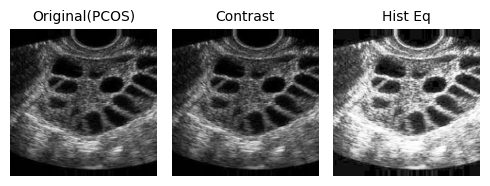

In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load an example image (Change the path to your dataset)
image_path = "/content/dataset/Datasets/train/images/img_0_113_jpg.rf.6e08e0fdfc50bc3659b7373c45f4a515.jpg"  # Example path, adjust if needed

img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # Load in grayscale

# Check if image loaded successfully
if img is None:
    print(f"Error: Could not load image from {image_path}. Please check the path.")
else:
    # 1️⃣ Contrast Adjustment (Enhance intensity)
    img_contrast = cv2.normalize(img, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX)

    # 3️⃣ Histogram Equalization (Improve contrast)
    img_hist_eq = cv2.equalizeHist(img_contrast)

    # 📊 Arrange images in a 1-row grid (3 images)
    images = [img, img_contrast, img_hist_eq]
    titles = ["Original(PCOS)", "Contrast", "Hist Eq"]

    # Set up the figure (1 row, 3 columns)
    fig, axes = plt.subplots(1, 3, figsize=(5, 5))  # 1 row, 3 columns

    # Iterate through the images and axes
    for i in range(len(images)):
        axes[i].imshow(images[i], cmap="gray")
        axes[i].set_title(titles[i], fontsize=10)
        axes[i].axis("off")

    # Remove all spaces
    plt.tight_layout()  # Adjust layout to prevent overlapping
    plt.show()

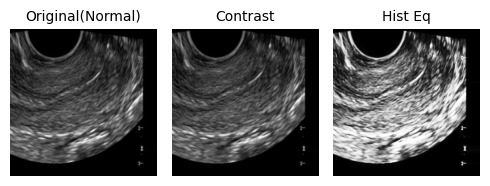

In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load an example image (Change the path to your dataset)
image_path = "/content/dataset/Datasets/train/images/img_0_1894_jpg.rf.ba568487f22b4005e56a018b4a30d021.jpg"  # Example path, adjust if needed

img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # Load in grayscale

# Check if image loaded successfully
if img is None:
    print(f"Error: Could not load image from {image_path}. Please check the path.")
else:
    # 1️⃣ Contrast Adjustment (Enhance intensity)
    img_contrast = cv2.normalize(img, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX)

    # 3️⃣ Histogram Equalization (Improve contrast)
    img_hist_eq = cv2.equalizeHist(img_contrast)

    # 📊 Arrange images in a 1-row grid (3 images)
    images = [img, img_contrast, img_hist_eq]
    titles = ["Original(Normal)", "Contrast", "Hist Eq"]

    # Set up the figure (1 row, 3 columns)
    fig, axes = plt.subplots(1, 3, figsize=(5, 5))  # 1 row, 3 columns

    # Iterate through the images and axes
    for i in range(len(images)):
        axes[i].imshow(images[i], cmap="gray")
        axes[i].set_title(titles[i], fontsize=10)
        axes[i].axis("off")

    # Remove all spaces
    plt.tight_layout()  # Adjust layout to prevent overlapping
    plt.show()

In [10]:
import os
import cv2
import numpy as np
import random
from datetime import datetime
from shutil import copy2

# Input directories
image_dir = r'/content/dataset/Datasets/train/images'
label_dir = r'/content/dataset/Datasets/train/labels'

# Output directories
output_image_dir = r'/content/dataset/Datasets/augmented/images'
output_label_dir = r'/content/dataset/Datasets/augmented/labels'

os.makedirs(output_image_dir, exist_ok=True)
os.makedirs(output_label_dir, exist_ok=True)

# Desired target images per class
TARGET_IMAGES_PER_CLASS = 500

# Count class distribution
def count_class_distribution(label_dir):
    class_counts = {'0': 0, '1': 0}
    for label_file in os.listdir(label_dir):
        if label_file.endswith('.txt'):
            with open(os.path.join(label_dir, label_file), 'r') as f:
                for line in f:
                    class_id = line.strip().split()[0]  # Extract class ID
                    if class_id in class_counts:
                        class_counts[class_id] += 1
    return class_counts

# Read YOLO labels
def read_yolo_labels(label_path):
    bboxes = []
    with open(label_path, "r") as f:
        for line in f:
            values = line.strip().split()
            class_id = int(values[0])
            x_center, y_center, width, height = map(float, values[1:])
            bboxes.append([class_id, x_center, y_center, width, height])
    return bboxes

# Save YOLO label files
def save_yolo_labels(label_path, bboxes):
    with open(label_path, "w") as f:
        for bbox in bboxes:
            f.write(f"{int(bbox[0])} {bbox[1]:.6f} {bbox[2]:.6f} {bbox[3]:.6f} {bbox[4]:.6f}\n")

# Augmentation functions
def flip_image(image, direction="horizontal"):
    if direction == "horizontal":
        return cv2.flip(image, 1), "flip_horizontal"
    elif direction == "vertical":
        return cv2.flip(image, 0), "flip_vertical"
    return image, None

def translate_image(image):
    tx, ty = random.randint(-10, 10), random.randint(-10, 10)
    translation_matrix = np.float32([[1, 0, tx], [0, 1, ty]])
    translated_img = cv2.warpAffine(image, translation_matrix, (image.shape[1], image.shape[0]))
    return translated_img, "translate"

def scale_image(image):
    scale_x, scale_y = 1.1, 1.1
    height, width = image.shape[:2]
    scaled_img = cv2.resize(image, (int(width * scale_x), int(height * scale_y)))
    scaled_img = cv2.resize(scaled_img, (width, height))  # Resize back to original
    return scaled_img, "scale"

# Function to adjust bounding boxes
def adjust_bboxes(bboxes, transform_type):
    updated_bboxes = []
    for bbox in bboxes:
        class_id, x_center, y_center, width, height = bbox
        if transform_type == "flip_horizontal":
            x_center = 1 - x_center
        elif transform_type == "flip_vertical":
            y_center = 1 - y_center
        elif transform_type == "translate":
            tx, ty = random.uniform(-0.1, 0.1), random.uniform(-0.1, 0.1)
            x_center += tx
            y_center += ty
            x_center, y_center = min(1.0, max(0.0, x_center)), min(1.0, max(0.0, y_center))
        updated_bboxes.append([class_id, x_center, y_center, width, height])
    return updated_bboxes

# Process dataset with increased augmentation
def process_dataset():
    image_files = [f for f in os.listdir(image_dir) if f.endswith('.jpg') or f.endswith('.png')]

    # Get current class distribution
    class_counts = count_class_distribution(label_dir)
    class_aug_counts = class_counts.copy()  # Track augmented counts

    for image_file in image_files:
        image_path = os.path.join(image_dir, image_file)
        label_path = os.path.join(label_dir, image_file.replace('.jpg', '.txt').replace('.png', '.txt'))

        if os.path.exists(label_path):
            image = cv2.imread(image_path)
            bboxes = read_yolo_labels(label_path)
            class_id = str(bboxes[0][0])  # Get class of image

            # Save original image & label
            orig_image_save_path = os.path.join(output_image_dir, image_file)
            orig_label_save_path = os.path.join(output_label_dir, image_file.replace('.jpg', '.txt').replace('.png', '.txt'))
            cv2.imwrite(orig_image_save_path, image)
            copy2(label_path, orig_label_save_path)

            # Augment images until each class reaches the target count
            while class_aug_counts[class_id] < TARGET_IMAGES_PER_CLASS:
                for aug_func in [flip_image, translate_image, scale_image]:  # Apply multiple augmentations
                    aug_image, transform_type = aug_func(image)

                    if transform_type:
                        aug_bboxes = adjust_bboxes(bboxes, transform_type)
                    else:
                        aug_bboxes = bboxes

                    timestamp = datetime.now().strftime("%Y%m%d%H%M%S")
                    new_filename = f"aug_{timestamp}_{random.randint(1000,9999)}.jpg"
                    new_labelname = new_filename.replace('.jpg', '.txt')

                    # Save augmented image & label
                    cv2.imwrite(os.path.join(output_image_dir, new_filename), aug_image)
                    save_yolo_labels(os.path.join(output_label_dir, new_labelname), aug_bboxes)

                    # Update class count
                    class_aug_counts[class_id] += 1

                    # Stop if we reach the target count
                    if class_aug_counts[class_id] >= TARGET_IMAGES_PER_CLASS:
                        break

# Run augmentation to increase dataset size to at least 500 per class
process_dataset()
print("Balanced augmentation completed.")


Balanced augmentation completed.


In [11]:
augmented_image_dir = "/content/dataset/Datasets/augmented/images"
augmented_label_dir = "/content/dataset/Datasets/augmented/labels"

def count_classes_in_augmented_folder(label_dir):
    class_counts = {'0': 0, '1': 0}
    for label_file in os.listdir(label_dir):
        if label_file.endswith('.txt'):
            with open(os.path.join(label_dir, label_file), 'r') as f:
                for line in f:
                    class_id = line.strip().split()[0]  # Extract class ID
                    if class_id in class_counts:
                        class_counts[class_id] += 1
    return class_counts


augmented_class_counts = count_classes_in_augmented_folder(augmented_label_dir)

print(f"Augmented Folder Class Counts: {augmented_class_counts}")


Augmented Folder Class Counts: {'0': 480, '1': 476}


In [12]:
import os

# Define the augmented dataset paths
aug_image_dir = r'/content/dataset/Datasets/augmented/images'

# Count number of images
image_count = len([f for f in os.listdir(aug_image_dir) if f.endswith(('.jpg', '.png'))])

print(f"Total augmented images: {image_count}")


Total augmented images: 955


In [13]:
import os
import numpy as np
import cv2
import joblib
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Flatten, Dropout
from sklearn.preprocessing import StandardScaler

# Paths to Image & Label Directories
train_image_dir = r'/content/dataset/Datasets/augmented/images'
train_label_dir = r'/content/dataset/Datasets/augmented/labels'
test_image_dir = r'/content/dataset/Datasets/test/images'
test_label_dir = r'/content/dataset/Datasets/test/labels'
# Load VGG16 Model (without Fully Connected Layers)
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Add Dropout & Flatten layers
x = Flatten()(base_model.output)
x = Dropout(0.6)(x)  # Dropout helps prevent overfitting
feature_extractor = Model(inputs=base_model.input, outputs=x)

# Freeze VGG16 layers
for layer in base_model.layers:
    layer.trainable = False

# Function to Extract Class Labels from YOLO TXT Files
def get_label_from_txt(label_path):
    if not os.path.exists(label_path):
        return None  # If label file is missing, return None

    with open(label_path, 'r') as file:
        lines = file.readlines()

    if len(lines) == 0:
        return None  # If label file is empty, return None

    first_line = lines[0].strip().split()  # Read first bounding box (YOLO format)
    class_label = int(first_line[0])  # Extract class ID (0 or 1)

    return class_label

# Function to Extract Features & Labels
def extract_features_and_labels(image_dir, label_dir):
    features = []
    labels = []

    for image_name in os.listdir(image_dir):
        if image_name.endswith('.jpg') or image_name.endswith('.png'):
            image_path = os.path.join(image_dir, image_name)
            label_path = os.path.join(label_dir, image_name.replace('.jpg', '.txt').replace('.png', '.txt'))

            # Get Class Label
            label = get_label_from_txt(label_path)
            if label is None:
                continue  # Skip images without labels

            # Load & Preprocess Image
            image = cv2.imread(image_path)
            image = cv2.resize(image, (224, 224))  # Resize for VGG16
            image = preprocess_input(image)  # Normalize using VGG16 preprocessing
            image = np.expand_dims(image, axis=0)

            # Extract Deep Features with Dropout
            feature = feature_extractor.predict(image)
            feature = feature.flatten()  # Flatten feature map

            features.append(feature)
            labels.append(label)

    return np.array(features), np.array(labels)

# Extract Features & Labels for Train and Test Sets
X_train, y_train = extract_features_and_labels(train_image_dir, train_label_dir)
X_test, y_test = extract_features_and_labels(test_image_dir, test_label_dir)

# Save Extracted Features & Labels
joblib.dump((X_train, y_train), "X_train_features_labels.pkl")
joblib.dump((X_test, y_test), "X_test_features_labels.pkl")
print(f"Feature extraction complete! Extracted {X_train.shape[0]} train images & {X_test.shape[0]} test images.")

# Standardize the Features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Save Scaled Features & Scaler
joblib.dump(scaler, "scaler.pkl")
joblib.dump((X_train_scaled, y_train), "X_train_scaled_labels.pkl")
joblib.dump((X_test_scaled, y_test), "X_test_scaled_labels.pkl")
print("Features successfully scaled and saved!")


58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 770ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 676ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 778ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 522ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 474ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 493ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 480ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 479ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 504ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 486ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 501ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 516ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 478ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 493ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 478ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 493ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 477ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 489ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 566ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 872ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 820ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 496ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 478ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 484ms/step
1/1 ━━━━━━━━━

In [14]:


from google.colab import files
files.download("scaler.pkl")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [15]:
# Print number of extracted features per image
print(f"🔹 Feature vector size (per image): {X_train.shape[1]}")
# Print total extracted features
print(f"🔹 Total training features: {X_train.shape}")
print(f"🔹 Total test features: {X_test.shape}")


🔹 Feature vector size (per image): 25088
🔹 Total training features: (955, 25088)
🔹 Total test features: (47, 25088)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 666ms/step


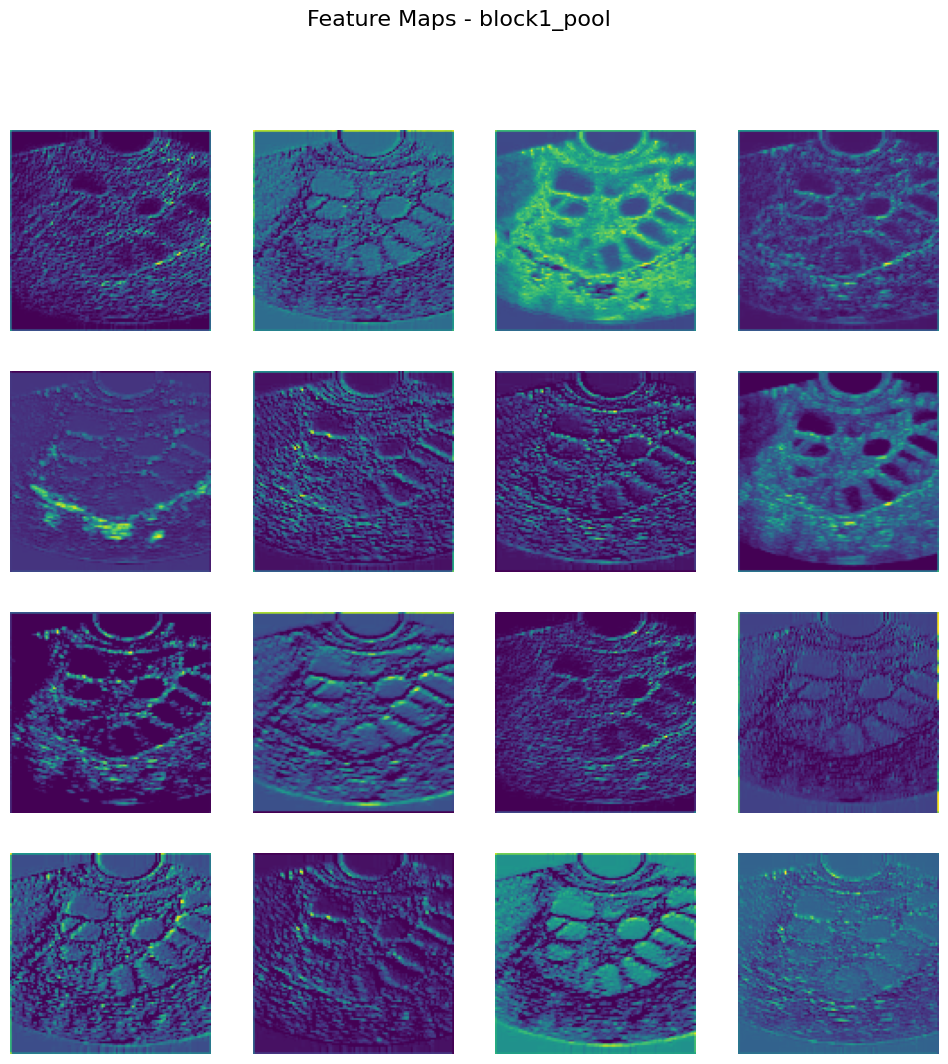

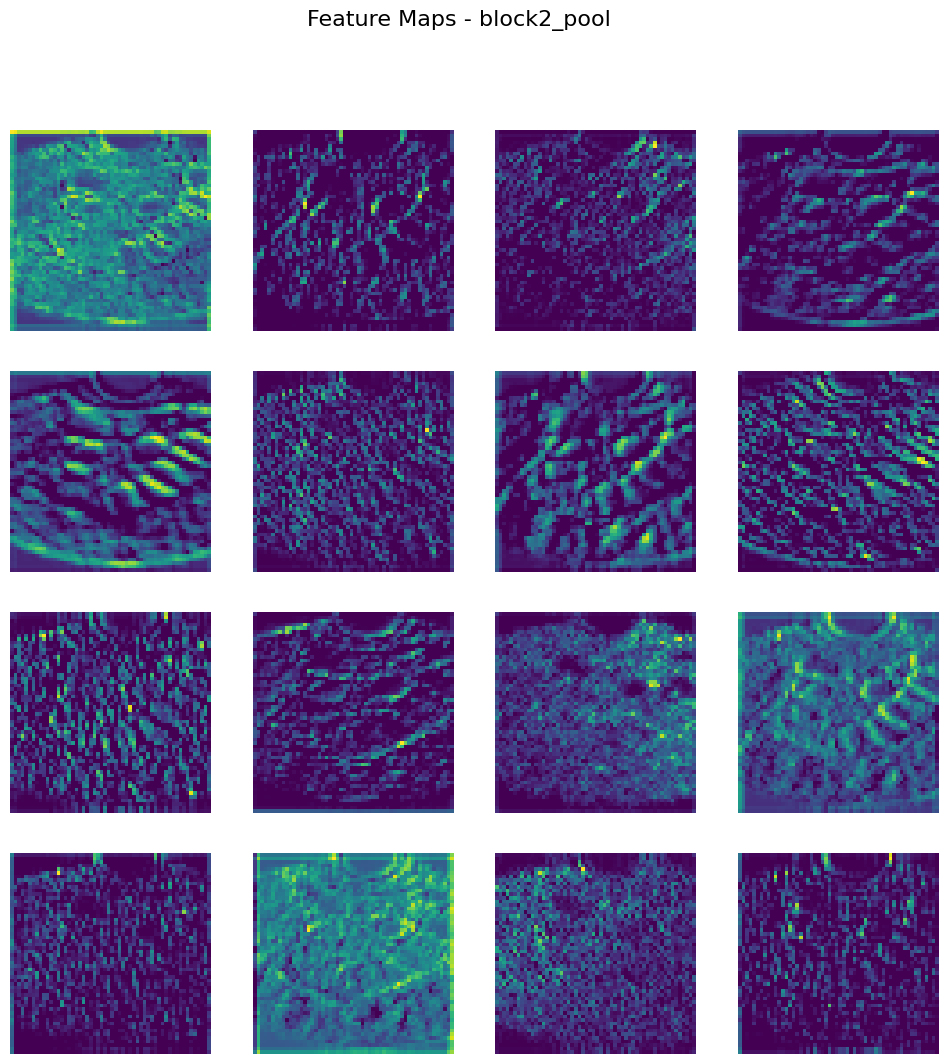

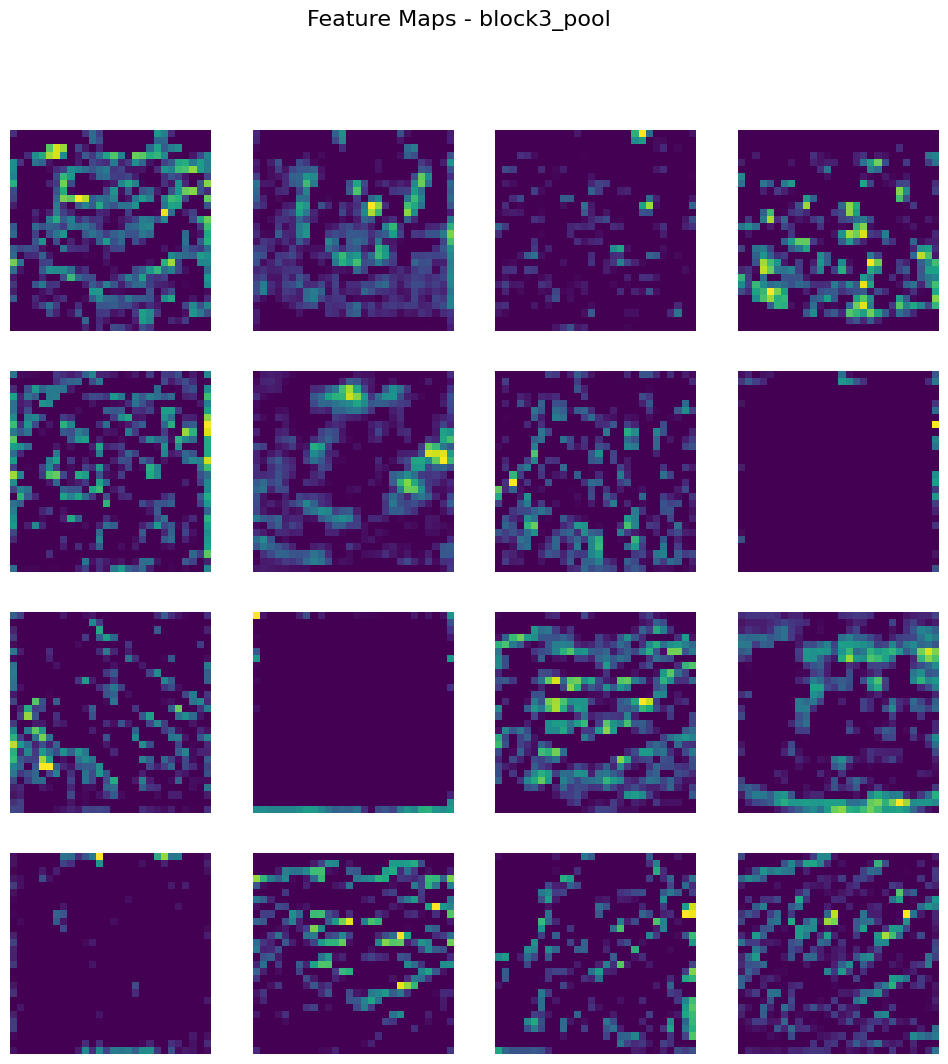

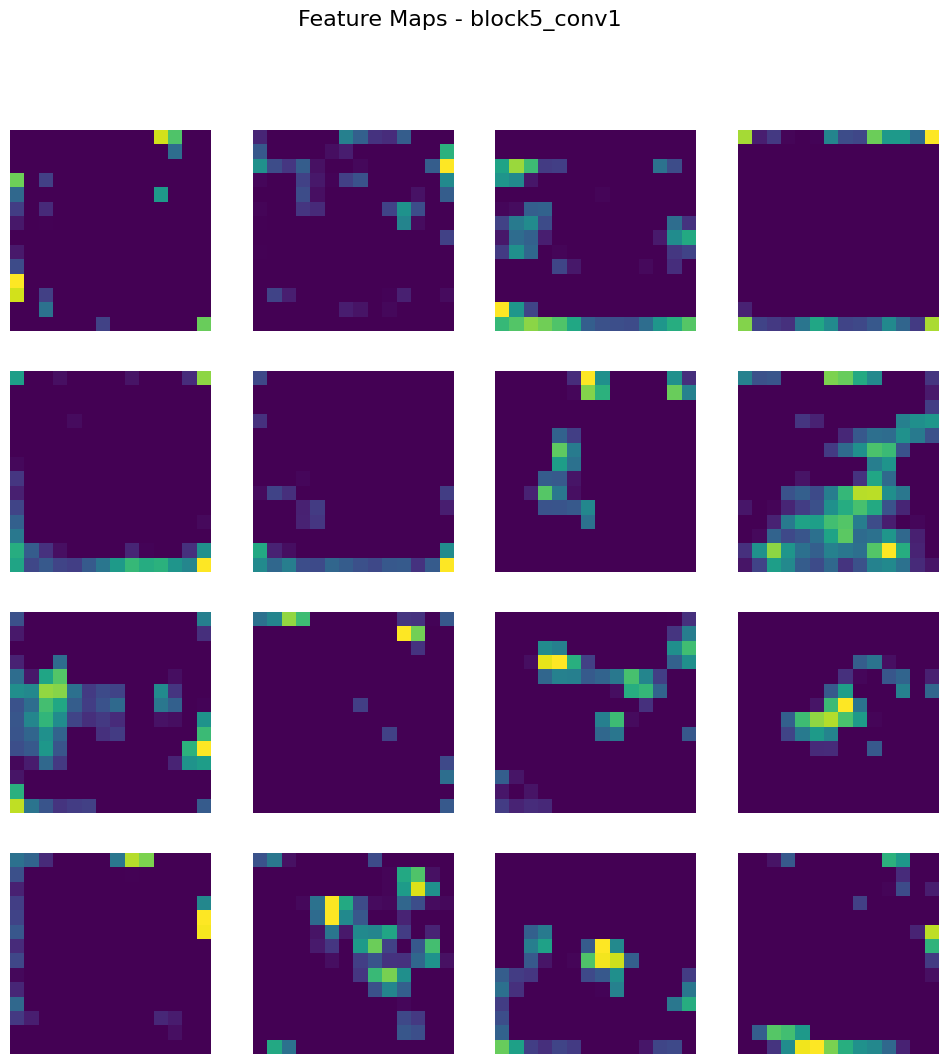

In [16]:
import matplotlib.pyplot as plt
import numpy as np
# Load pre-trained VGG16 model
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Select deeper layers to visualize
layer_indices = [3, 6, 10, 15]  # Indices of deeper layers
layer_outputs = [base_model.layers[i].output for i in layer_indices]
feature_extractor = Model(inputs=base_model.input, outputs=layer_outputs)

# Load an example image (Change the path to your dataset)
image_path = "/content/dataset/Datasets/train/images/img_0_113_jpg.rf.6e08e0fdfc50bc3659b7373c45f4a515.jpg"  # Example path

image = cv2.imread(image_path)
if image is None:
    print(f"Error: Could not load image from {image_path}. Please check the path.")
else:
    image = cv2.resize(image, (224, 224))  # Resize to VGG16 input size
    image = preprocess_input(image)  # Apply VGG16 preprocessing
    image = np.expand_dims(image, axis=0)  # Expand dimensions to match model input

    # Extract feature maps
    feature_maps = feature_extractor.predict(image)

    # Visualize feature maps from different layers
    layer_names = [base_model.layers[i].name for i in layer_indices]
    for layer_name, fmap in zip(layer_names, feature_maps):
        num_filters = min(16, fmap.shape[-1])  # Show up to 16 feature maps
        fig, axes = plt.subplots(4, 4, figsize=(12, 12))  # 4x4 grid
        fig.suptitle(f"Feature Maps - {layer_name}", fontsize=16)
        for i in range(num_filters):
            ax = axes[i // 4, i % 4]
            ax.imshow(fmap[0, :, :, i], cmap='viridis')  # Select feature map
            ax.axis("off")
        plt.show()


In [76]:
import joblib
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load Extracted Features
X_train_scaled, y_train = joblib.load("X_train_scaled_labels.pkl")
X_test_scaled, y_test = joblib.load("X_test_scaled_labels.pkl")

# Check Class Imbalance
class_0_count = sum(y_train == 0)
class_1_count = sum(y_train == 1)
scale_pos_weight = class_0_count / class_1_count  # Handle imbalance

# Train XGBoost with Regularization
xgb_model = XGBClassifier(
    n_estimators=100,  # Number of estimators might need adjustment
    max_depth=2,  # Increased tree depth
    learning_rate=0.0025,  # Increased learning rate
    reg_lambda=100, reg_alpha=50,  # Reduced regularization
    subsample=0.6, colsample_bytree=0.7,
    min_child_weight=6, gamma=4,
    scale_pos_weight = (class_0_count / class_1_count) * 0.9,  # Adjust as needed
    eval_metric='logloss',
    use_label_encoder=False
)
xgb_model.fit(X_train_scaled, y_train)

# Evaluate on Training Data
y_train_pred = xgb_model.predict(X_train_scaled)
train_accuracy = accuracy_score(y_train, y_train_pred)
print("Train Accuracy:", train_accuracy)
print("Train Classification Report:\n", classification_report(y_train, y_train_pred))

# Evaluate on Test Data
y_test_pred = xgb_model.predict(X_test_scaled)
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Test Accuracy:", test_accuracy)
print("Test Classification Report:\n", classification_report(y_test, y_test_pred))


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [15:58:12] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Train Accuracy: 0.9853403141361257
Train Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99       480
           1       1.00      0.97      0.99       475

    accuracy                           0.99       955
   macro avg       0.99      0.99      0.99       955
weighted avg       0.99      0.99      0.99       955

Test Accuracy: 0.9574468085106383
Test Classification Report:
               precision    recall  f1-score   support

           0       0.93      1.00      0.96        27
           1       1.00      0.90      0.95        20

    accuracy                           0.96        47
   macro avg       0.97      0.95      0.96        47
weighted avg       0.96      0.96      0.96        47



In [77]:
# prompt: calculate specificity

from sklearn.metrics import confusion_matrix

# Assuming y_test and y_test_pred are already defined from your XGBoost model
tn, fp, fn, tp = confusion_matrix(y_test, y_test_pred).ravel()

specificity = tn / (tn + fp)
print(f"Specificity: {specificity}")


Specificity: 1.0


In [78]:
# prompt: check validation accuracy

# Evaluate on Validation Data (assuming you have a validation set)
# If you don't have a separate validation set, you can use a portion of your training data for validation.

# Assuming X_val_scaled and y_val are your scaled validation features and labels
y_val_pred = xgb_model.predict(X_test_scaled) #Replace with your validation data
val_accuracy = accuracy_score(y_test, y_val_pred) #Replace with your validation labels
print("Validation Accuracy:", val_accuracy)
print("Validation Classification Report:\n", classification_report(y_test, y_val_pred)) #Replace with your validation labels


Validation Accuracy: 0.9574468085106383
Validation Classification Report:
               precision    recall  f1-score   support

           0       0.93      1.00      0.96        27
           1       1.00      0.90      0.95        20

    accuracy                           0.96        47
   macro avg       0.97      0.95      0.96        47
weighted avg       0.96      0.96      0.96        47



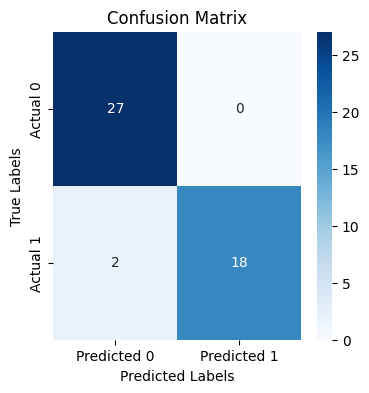

In [79]:
# prompt: show confusion matric image

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Assuming y_test and y_test_pred are already defined from your XGBoost model
cm = confusion_matrix(y_test, y_test_pred)

plt.figure(figsize=(4, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()


In [80]:
# prompt: save the model

import joblib
joblib.dump(xgb_model, "pcos_xgb_model.pkl")

print("Model saved successfully!")


Model saved successfully!


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 695ms/step


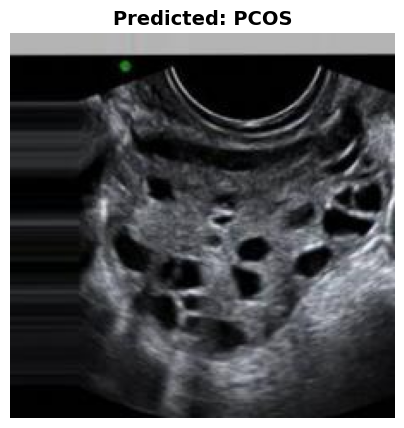

In [81]:
import cv2
import numpy as np
import joblib
import matplotlib.pyplot as plt
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input

# 🔹 Load Pretrained VGG16 Model (Feature Extractor)
vgg16_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# 🔹 Load Trained XGBoost Model & Scaler
scaler = joblib.load("scaler.pkl")  # Load feature scaler
xgb_model = joblib.load("pcos_xgb_model.pkl") # Load trained XGBoost model

# 🔹 Function to Predict and Display Image
def predict_and_show_image(image_path):
    """
    Loads an image, extracts features using VGG16, scales the features,
    makes a prediction with XGBoost, and displays the image with results.
    """
    # Load and preprocess image
    image = cv2.imread(image_path)
    image_resized = cv2.resize(image, (224, 224))  # Resize for VGG16
    image_preprocessed = preprocess_input(image_resized)  # Normalize
    image_expanded = np.expand_dims(image_preprocessed, axis=0)  # Add batch dimension

    # Extract features using VGG16
    features = vgg16_model.predict(image_expanded)
    features = features.flatten().reshape(1, -1)  # Flatten and reshape

    # Scale features using the loaded scaler
    features_scaled = scaler.transform(features)

    # Predict with XGBoost
    prediction = xgb_model.predict(features_scaled)

    # 🔹 Output Result
    class_label = "PCOS" if prediction[0] == 1 else "Normal"


    # 🔹 Display Image with Prediction
    plt.figure(figsize=(5, 5))
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB for correct display
    plt.imshow(image_rgb)
    plt.axis("off")
    plt.title(f"Predicted: {class_label}",
              fontsize=14, fontweight='bold', color='black')
    plt.show()

    return class_label

# 🔹 Example Usagejpg
image_path = r"/content/dataset/Datasets/valid/images/img_0_2500_jpg.rf.d78db30c720bffea33e7fd733630ca21.jpg"
predicted_class = predict_and_show_image(image_path)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 761ms/step


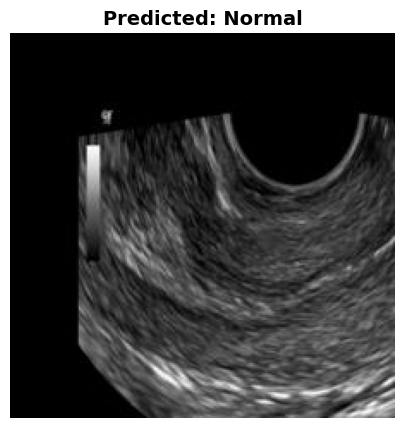

In [82]:
import cv2
import numpy as np
import joblib
import matplotlib.pyplot as plt
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input

# 🔹 Load Pretrained VGG16 Model (Feature Extractor)
vgg16_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# 🔹 Load Trained XGBoost Model & Scaler
scaler = joblib.load("scaler.pkl")  # Load feature scaler
xgb_model = joblib.load("pcos_xgb_model.pkl") # Load trained XGBoost model

# 🔹 Function to Predict and Display Image
def predict_and_show_image(image_path):
    """
    Loads an image, extracts features using VGG16, scales the features,
    makes a prediction with XGBoost, and displays the image with results.
    """
    # Load and preprocess image
    image = cv2.imread(image_path)
    image_resized = cv2.resize(image, (224, 224))  # Resize for VGG16
    image_preprocessed = preprocess_input(image_resized)  # Normalize
    image_expanded = np.expand_dims(image_preprocessed, axis=0)  # Add batch dimension

    # Extract features using VGG16
    features = vgg16_model.predict(image_expanded)
    features = features.flatten().reshape(1, -1)  # Flatten and reshape

    # Scale features using the loaded scaler
    features_scaled = scaler.transform(features)

    # Predict with XGBoost
    prediction = xgb_model.predict(features_scaled)

    # 🔹 Output Result
    class_label = "PCOS" if prediction[0] == 1 else "Normal"


    # 🔹 Display Image with Prediction
    plt.figure(figsize=(5, 5))
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB for correct display
    plt.imshow(image_rgb)
    plt.axis("off")
    plt.title(f"Predicted: {class_label}",
              fontsize=14, fontweight='bold', color='black')
    plt.show()

    return class_label

# 🔹 Example Usagejpg
image_path = r"/content/dataset/Datasets/valid/images/img_0_3154_jpg.rf.9482c1d690d7b321404edf155060b8a0.jpg"
predicted_class = predict_and_show_image(image_path)


In [83]:
from google.colab import files
files.download('pcos_xgb_model.pkl')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>